In [26]:
!pip install yfinance
!pip install bs4
!pip install html5lib
!pip install lxml

  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1272 sha256=dc000409eb02a5fa1aaf6b29df73662191a11416bddad830df010d1be0e3c4a8
  Stored in directory: c:\users\faten\appdata\local\pip\cache\wheels\73\2b\cb\099980278a0c9a3e57ff1a89875ec07bfa0b6fcbebb9a8cad3
Successfully built bs4


In [82]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

Question 1 - Extracting Tesla Stock Data Using yfinance

In [21]:
tesla = yf.Ticker('TSLA')
tesla_df = tesla.history(period='max')
tesla_df.reset_index(inplace=True)
tesla_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


Question 2 - Extracting Tesla Revenue Data Using Webscraping

In [48]:
tesla_url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
tesla_data = requests.get(tesla_url).text
soup = BeautifulSoup(tesla_data)

In [126]:
date = []
revenue = []
for row in soup.find('tbody').find_all('tr'):
    col = row.find_all('td')
    date.append(col[0].text)
    revenue.append(col[1].text)
tesla_r_df = pd.DataFrame({'Date':date,'Revenue':revenue})
tesla_r_df.tail()

,Date,Revenue
10,2013,"$8,887"
11,2012,"$9,551"
12,2011,"$9,474"
13,2010,"$9,078"
14,2009,"$8,806"


Question 3 - Extracting GameStop Stock Data Using yfinance

In [22]:
gamestop = yf.Ticker('GME')
gamestop_df = gamestop.history(period='max')
gamestop_df.reset_index(inplace=True)
gamestop_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


Question 4 - Extracting GameStop Revenue Data Using Webscraping

In [49]:
url_gamestop = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'
gamestop_data = requests.get(url_gamestop).text
gamestop_data
soup = BeautifulSoup(gamestop_data)

In [127]:
date = []
revenue = []
for row in soup.find('tbody').find_all('tr'):
    col = row.find_all('td')
    date.append(col[0].text)
    revenue.append(col[1].text)
gamestop_r_df = pd.DataFrame({'Date':date,'Revenue':revenue})
gamestop_r_df.tail()

,Date,Revenue
10,2013,"$8,887"
11,2012,"$9,551"
12,2011,"$9,474"
13,2010,"$9,078"
14,2009,"$8,806"


In [118]:
# Removing $ and ,
tesla_r_df.Revenue = tesla_r_df.Revenue.apply(lambda x: re.sub('\$|,','',x))
gamestop_r_df.Revenue = gamestop_r_df.Revenue.apply(lambda x: re.sub('\$|,','',x))

In [119]:
# changing the data types of gamestop data
gamestop_r_df.Revenue = gamestop_r_df.Revenue.astype(float)
gamestop_r_df.Date = pd.to_datetime(gamestop_r_df.Date, infer_datetime_format=True)
gamestop_r_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     15 non-null     datetime64[ns]
 1   Revenue  15 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 368.0 bytes


In [80]:
# changing the data types of tesla data
tesla_r_df.Revenue = tesla_r_df.Revenue.astype(float)
tesla_r_df.Date = pd.to_datetime(tesla_r_df.Date, infer_datetime_format=True)
tesla_r_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     14 non-null     datetime64[ns]
 1   Revenue  14 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 352.0 bytes


Question 5 - Tesla Stock and Revenue Dashboard

Tesla Dashboard

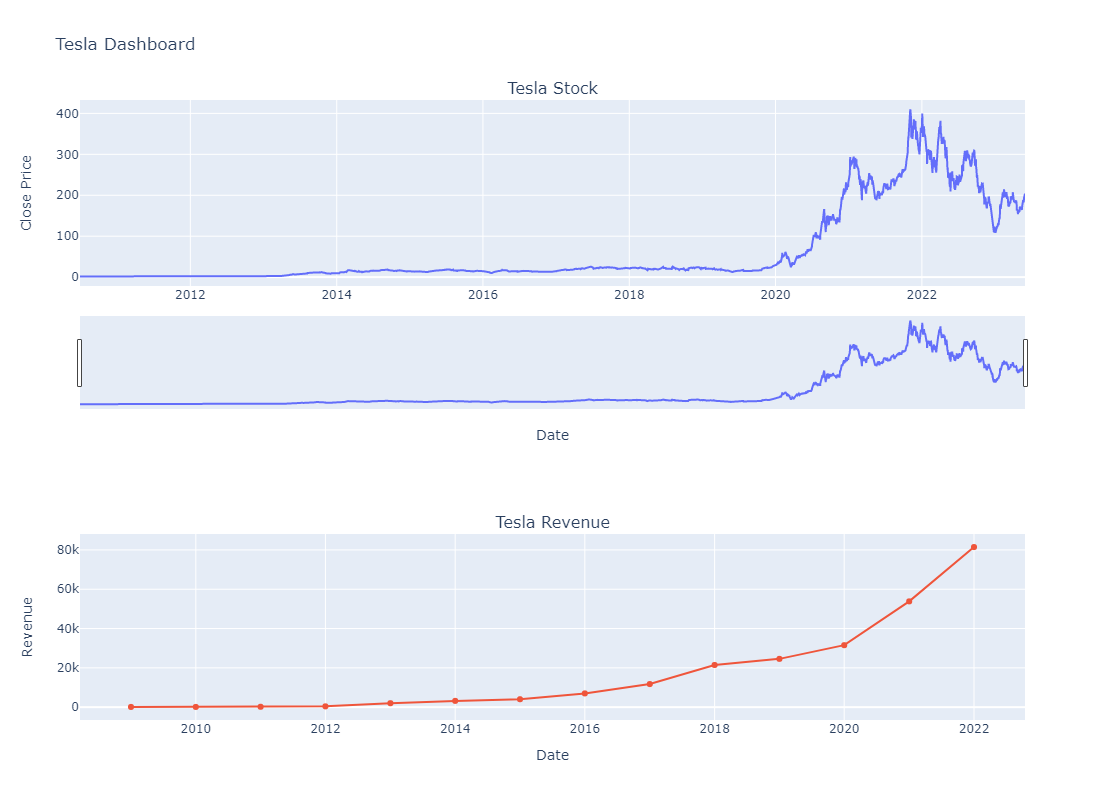

In [124]:

fig = make_subplots(rows=2, cols=1,vertical_spacing=0.4,subplot_titles=['Tesla Stock','Tesla Revenue'])
fig.add_trace(
    go.Scatter(x=tesla_df.Date, y=tesla_df.Close),
    row=1, col=1
)

fig.add_trace(
    go.Scatter( x=tesla_r_df.Date, y=tesla_r_df.Revenue),
    row=2, col=1
)
fig.update_yaxes(title_text="Close Price", row=1, col=1)
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_yaxes(title_text="Revenue", row=2, col=1)
fig.update_xaxes(title_text="Date", row=2, col=1)
fig.update_layout(height=800, width=800, title_text="Tesla Dashboard",xaxis_rangeslider_visible=True,showlegend=False)
fig.show()

Question 6 - GameStop Stock and Revenue Dashboard

GameSpot Dashboard

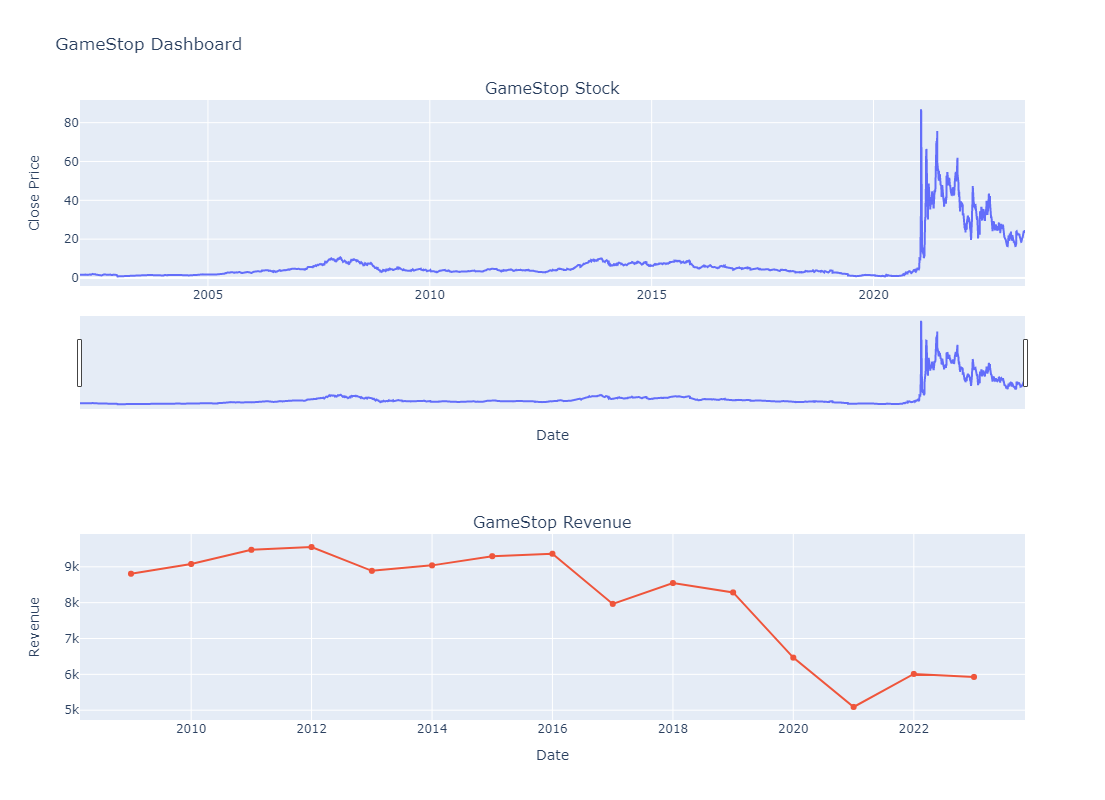

In [125]:
fig = make_subplots(rows=2, cols=1,vertical_spacing=0.4,subplot_titles=['GameStop Stock','GameStop Revenue'])
fig.add_trace(go.Scatter(x=gamestop_df.Date, y=gamestop_df.Close),row=1, col=1)
fig.add_trace(go.Scatter( x=gamestop_r_df.Date, y=gamestop_r_df.Revenue),row=2, col=1)
fig.update_yaxes(title_text="Close Price", row=1, col=1)
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_yaxes(title_text="Revenue", row=2, col=1)
fig.update_xaxes(title_text="Date", row=2, col=1)
fig.update_layout(height=800, width=800, title_text="GameStop Dashboard",xaxis_rangeslider_visible=True,showlegend=False)
fig.show()